In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wine = pd.read_csv("/content/drive/MyDrive/Datasets/wine.csv")
wine.drop('type', axis=1, inplace=True)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine.shape
wine = wine.dropna()

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# wine['type'].value_counts()

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Visualization


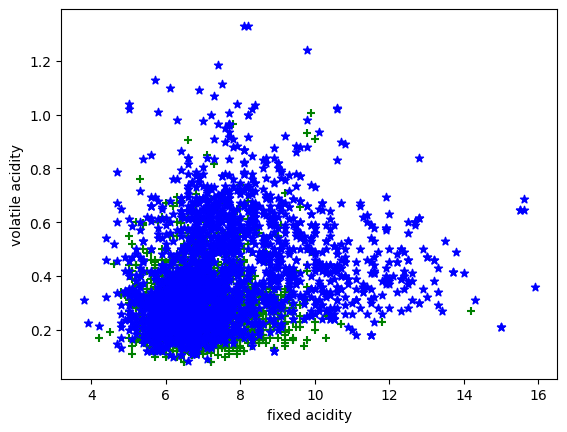

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.scatter(wine[0:3000]['fixed acidity'], wine[0:3000]['volatile acidity'], color='green', marker='+')
plt.scatter(wine[3000:6000]['fixed acidity'], wine[3000:6000]['volatile acidity'], color='blue', marker='*')

In [ ]:
import numpy as np

def remove_outliers(df, column, lower_percentile=25, upper_percentile=75, threshold=1.5):
    # Calculate the IQR
    q1 = np.percentile(df[column], lower_percentile)
    q3 = np.percentile(df[column], upper_percentile)
    iqr = q3 - q1

    # Set lower and upper bounds to filter outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Filter the DataFrame to remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

for i in wine.columns:
  wine = remove_outliers(wine, i)

In [ ]:
X = wine.iloc[:, 0:11]
X.head()

# # Convert the "column_name" to numeric
# # from sklearn.preprocessing import LabelEncoder

# # Create a label encoder object
# label_encoder = LabelEncoder()

# # Fit and transform the categorical column to numeric values
# X['type'] = label_encoder.fit_transform(X['type'])
# X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1


In [ ]:
Y = wine.iloc[:, -1]


Y.head()

1    6
2    6
3    6
4    6
5    6
Name: quality, dtype: int64

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
X[:5]

array([[-0.73725665,  0.16060307,  0.21909259, -0.91420936,  0.33293028,
        -1.23476147,  0.03610896, -0.02181932,  0.69906775, -0.03894499,
        -0.87996154],
       [ 1.42158605, -0.03785071,  0.88309346,  0.20061123,  0.41181053,
        -0.19763882, -0.70865642,  0.37010163,  0.41933881, -0.50330533,
        -0.37638943],
       [ 0.3421647 , -0.53398518, -0.00224103,  0.53716085,  1.0428525 ,
         0.90430399,  1.18517554,  0.54824752, -0.07018682, -0.8747936 ,
        -0.5442468 ],
       [ 0.3421647 , -0.53398518, -0.00224103,  0.53716085,  1.0428525 ,
         0.90430399,  1.18517554,  0.54824752, -0.07018682, -0.8747936 ,
        -0.5442468 ],
       [ 1.42158605, -0.03785071,  0.88309346,  0.20061123,  0.41181053,
        -0.19763882, -0.70865642,  0.37010163,  0.41933881, -0.50330533,
        -0.37638943]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.fit_transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors=10)
knnModel.fit(X_train, Y_train)
Y_predict = knnModel.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predict)
print(accuracy)

0.5881683731513083


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
knnModel.predict([[6.4, 0.24, 0.35, 1.5, 0.044, 100.00, 0.9921, 3.10, 0.44, 7.5, 5]])

array([6])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
cm

array([[  1,  12,   8,   3],
       [  2, 165,  96,   8],
       [  2,  79, 279,  49],
       [  0,   9,  94,  72]])

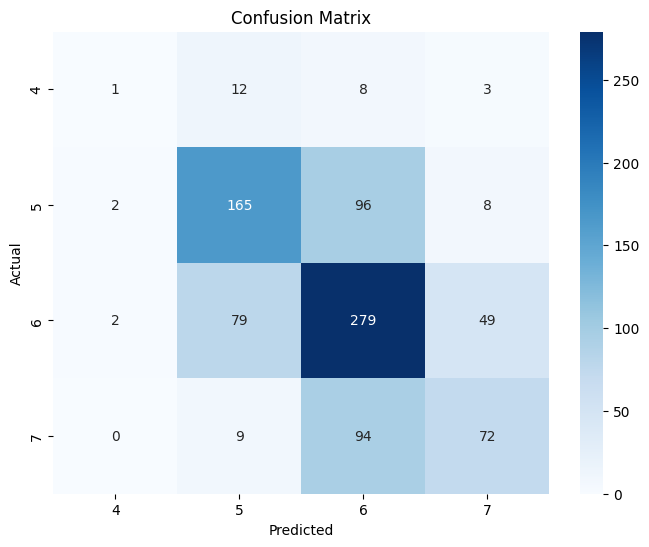

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knnModel.classes_, yticklabels=knnModel.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()